In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

This dataset contains census information.

In [2]:
census = pd.read_csv('Adult.csv', header = 0, na_values = ' ?')

In [3]:
census.head()

,Age,Workclass,flnwgt,Education,Education number,Marital status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Native Country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
census.info()
census.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age                 32561 non-null int64
Workclass           30725 non-null object
flnwgt              32561 non-null int64
Education           32561 non-null object
Education number    32561 non-null int64
Marital status      32561 non-null object
Occupation          30718 non-null object
Relationship        32561 non-null object
Race                32561 non-null object
Sex                 32561 non-null object
Capital-Gain        32561 non-null int64
Capital-Loss        32561 non-null int64
Hours-per-week      32561 non-null int64
Native Country      31978 non-null object
Salary              32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,Age,flnwgt,Education number,Capital-Gain,Capital-Loss,Hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
#The variables workclass and occupation contains around 2,000 NaN values, so lets look deeper into it
print(census.Education[census.Workclass.isnull()].value_counts())
print(census.Occupation[census.Workclass.isnull()].value_counts())
print(census['Marital status'][census.Workclass.isnull()].value_counts())
print(census['Native Country'][census.Workclass.isnull()].value_counts())

 HS-grad         532
 Some-college    514
 Bachelors       173
 11th            118
 10th            100
 7th-8th          72
 Assoc-voc        61
 9th              51
 Masters          48
 Assoc-acdm       47
 12th             40
 5th-6th          30
 Prof-school      18
 Doctorate        15
 1st-4th          12
 Preschool         5
Name: Education, dtype: int64
Series([], Name: Occupation, dtype: int64)
 Never-married            766
 Married-civ-spouse       636
 Divorced                 184
 Widowed                  153
 Separated                 66
 Married-spouse-absent     29
 Married-AF-spouse          2
Name: Marital status, dtype: int64
 United-States         1659
 Mexico                  33
 Canada                  14
 Philippines             10
 Taiwan                   9
 Germany                  9
 South                    9
 China                    7
 El-Salvador              6
 Italy                    5
 Puerto-Rico              5
 Poland                   4
 England  

In [6]:
#The NaN values seem to be random and considering the number of observations I have,
#I'll drop the NaN values instead of imputing.
census = census.dropna()
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
Age                 30162 non-null int64
Workclass           30162 non-null object
flnwgt              30162 non-null int64
Education           30162 non-null object
Education number    30162 non-null int64
Marital status      30162 non-null object
Occupation          30162 non-null object
Relationship        30162 non-null object
Race                30162 non-null object
Sex                 30162 non-null object
Capital-Gain        30162 non-null int64
Capital-Loss        30162 non-null int64
Hours-per-week      30162 non-null int64
Native Country      30162 non-null object
Salary              30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
#To make prediction easier lets change the target value to a binary variable. 1 if salary is over 50K and 0 if it is under.
census['Salary'] = census['Salary'].str.strip()
census = census.replace({'Salary': {'<=50K':0, '>50K':1}})
census['Salary'] = pd.to_numeric(census['Salary'])

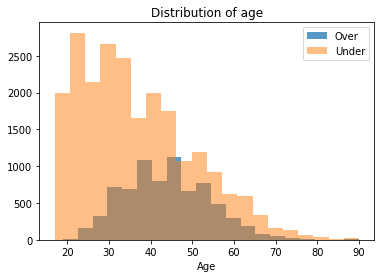

In [8]:
#Lets try to see how salary interacts with age
plt.hist(census['Age'][census.Salary == 1], bins = 20, alpha = 0.75, label = 'Over 50K')
plt.hist(census['Age'][census.Salary == 0], bins = 20, alpha = 0.5, label = 'Under 50K')
plt.title("Distribution of age")
plt.legend(['Over', 'Under'])
plt.xlabel("Age")
plt.show()

In [9]:
#As expected younger people tend to have lower salaries. There is also a lot more salaries under 50K than over, 
#so the dataset is unbalanced with about 25% salary over and 75% under.
#Lets now look at the categoricals variables.

census['Workclass'] = census['Workclass'].astype('category')
print(census['Workclass'].describe())
census['Occupation'] = census['Occupation'].astype('category')
print(census['Occupation'].describe())
census['Marital status'] = census['Marital status'].astype('category')
print(census['Marital status'].describe())
census['Native Country'] = census['Native Country'].astype('category')
print(census['Native Country'].describe())
census['Race'] = census['Race'].astype('category')
print(census['Race'].describe())
census['Sex'] = census['Sex'].astype('category')
print(census['Sex'].describe())
census['Relationship'] = census['Relationship'].astype('category')
print(census['Relationship'].describe())
census['Education'] = census['Education'].str.strip()
census['Education'] = census['Education'].astype('category')
print(census['Education'].describe())

count        30162
unique           7
top        Private
freq         22286
Name: Workclass, dtype: object
count               30162
unique                 14
top        Prof-specialty
freq                 4038
Name: Occupation, dtype: object
count                   30162
unique                      7
top        Married-civ-spouse
freq                    14065
Name: Marital status, dtype: object
count              30162
unique                41
top        United-States
freq               27504
Name: Native Country, dtype: object
count      30162
unique         5
top        White
freq       25933
Name: Race, dtype: object
count     30162
unique        2
top        Male
freq      20380
Name: Sex, dtype: object
count        30162
unique           6
top        Husband
freq         12463
Name: Relationship, dtype: object
count       30162
unique         16
top       HS-grad
freq         9840
Name: Education, dtype: object


True
True


Text(0.5,1,'Education number distribution')

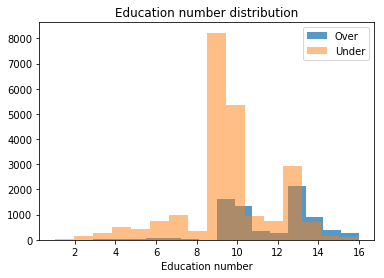

In [10]:
#I'll have to create dummy variables for those because there is no order between levels. Next I want to look at education
#because there is two fields related to this characteristic and I think they might mean the same thing.

##If we compare Doctorate with 16 and Prof-school with 15 we get an equal number of observation, which probably
#means they are the same.
print(len(census[census.Education == 'Doctorate']) == len(census[census['Education number'] == 16]))
print(len(census[census.Education == 'Prof-school']) == len(census[census['Education number'] == 15]))

#Lets now look at the distribution of education number
plt.hist(census['Education number'][census.Salary == 1], bins = 16, alpha = 0.75)
plt.hist(census['Education number'][census.Salary == 0], bins = 16, alpha = 0.5)
plt.xlabel('Education number')
plt.legend(['Over', 'Under'])
plt.title("Education number distribution")

In [11]:
#Since education and education number are the same I'll drop education.
census = census.drop(['Education'], axis = 1)

#The previous histogram shows that people with more education tends to have higher salary. This is as expected.

Text(0.5,1,'Capital-Gain')

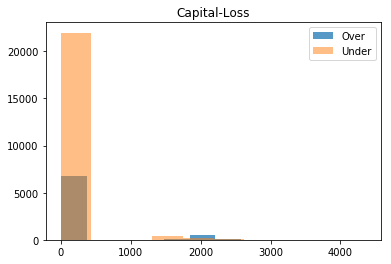

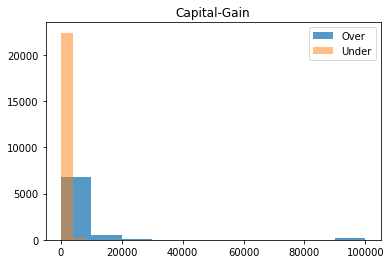

In [12]:
#The next thing I want to look at is the capital-gain and capital-loss variables.
plt.hist(census['Capital-Loss'][census.Salary == 1], alpha = 0.75)
plt.hist(census['Capital-Loss'][census.Salary == 0], alpha = 0.5)
plt.legend(['Over', 'Under'])
plt.title("Capital-Loss")
plt.figure()
plt.hist(census['Capital-Gain'][census.Salary == 1], alpha = 0.75)
plt.hist(census['Capital-Gain'][census.Salary == 0], alpha = 0.5)
plt.legend(['Over', 'Under'])
plt.title("Capital-Gain")

In [13]:
#There seems to be outliers in the capital-gain histogram(the ones with value around 100K). 
#However looking at the following dataframe we see that they all have
#salaries over 50K, so those observations probably represent people who are doing well. We can also see that 99999 was probably 
#the maximum value possible for the survey.
census[census['Capital-Gain'] > 50000]

,Age,Workclass,flnwgt,Education number,Marital status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Native Country,Salary
1246,54,Self-emp-inc,166459,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,1
1368,52,Private,152234,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,1
1482,53,Self-emp-inc,263925,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,1
1528,52,Private,118025,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,1
1616,46,Private,370119,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,1
1682,43,Private,176270,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,60,United-States,1
1765,49,Private,159816,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,99999,0,20,United-States,1
1771,50,Private,171338,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,1
1826,22,Self-emp-not-inc,202920,9,Never-married,Prof-specialty,Unmarried,White,Female,99999,0,40,Dominican-Republic,1
2103,43,Self-emp-inc,172826,10,Married-civ-spouse,Sales,Husband,White,Male,99999,0,55,United-States,1


Text(0.5,1,'Flnwgt distribution')

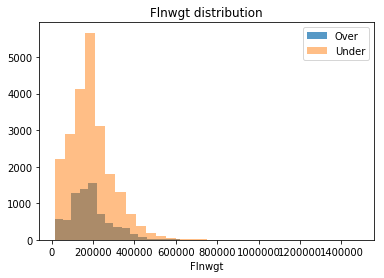

In [14]:
#The last variable I want to look at is the flnwgt which is supposed to be some kind of weight. I want to see if it is
#a good predictor.
plt.hist(census.flnwgt[census.Salary == 1], bins = 30, alpha = 0.75)
plt.hist(census.flnwgt[census.Salary == 0], bins = 30, alpha =0.5)
plt.xlabel('Flnwgt')
plt.legend(['Over', 'Under'])
plt.title('Flnwgt distribution')

In [15]:
#The distribution looks the same for both salary range, however since there are more observations with a 
#salary under 50K the magnitude of this histogram is more important. 
#The more data I have the better, so I'll keep this variable for now.

#It is time to prepare for the predictive analysis.
#I need to convert the target value to a categorical variable because I'm doing classification.
census.Salary = census.Salary.astype('category')

In [16]:
#I also have to create dummy variables for each categorical variables. To speed up the process
#I'll make my own function.
def creating_dummy(categorical_variables):
    final_dummy = []
    for i in categorical_variables:
        final_dummy.append(pd.get_dummies(census[i], drop_first= True))
    
    return final_dummy
        
dummies = creating_dummy(['Occupation', "Workclass", 'Marital status', 'Relationship', 'Race', 'Sex', 'Native Country'])

census = census.drop(["Occupation"], axis = 1)
census = census.drop(["Workclass"], axis = 1)
census = census.drop(["Marital status"], axis = 1)
census = census.drop(["Relationship"], axis = 1)
census = census.drop(["Race"], axis = 1)
census = census.drop(["Sex"], axis = 1)
census = census.drop(['Native Country'], axis = 1)

for i in range(len(dummies)):
    census = pd.concat([census, dummies[i]], axis = 1)


cols = census.columns.tolist()
cols = cols[:6] + cols[7:] + cols[6:7]
census = census[cols]
census.head()

,Age,flnwgt,Education number,Capital-Gain,Capital-Loss,Hours-per-week,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Salary
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


C:\Users\maroi\Anaconda35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
#Normally I would try multiple model to find which one would yield the best results, however here I will
#stick to a random forest model and tune it to get better prediction. Using this kind of model also means
#I don't have to scale my numerical data.
seed = np.random.seed(42)

X = census.iloc[:, 0:-2]
y = census.iloc[:, -1]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=seed)

kFold = KFold(n_splits=10, random_state=seed)

model = RandomForestClassifier()
score = cross_val_score(model, X_train, Y_train, cv=kFold, scoring='accuracy')
np.mean(score)

0.84359087625829976

In [19]:
#With the default model I get an average accuracy of 84% using cross-validation on the training set.
#Next I'll tune the model to get better prediction on the training set and I'll test the model on the validation set.
#In order to get a code that runs fairly fast I only look at number of estimator, but normally I would look at more parameters.
#This cell might take 3-4 minutes to run.
n_trees = np.arange(15,21)
param_grid = {'n_estimators' : n_trees}

grid = GridSearchCV(model, param_grid= param_grid, scoring = 'accuracy', cv = 10)
grid.fit(X_train, Y_train)
best_number_estimator = grid.best_params_['n_estimators']
grid.best_score_

0.85154792987691164

In [20]:
model = RandomForestClassifier(n_estimators=best_number_estimator)
score = cross_val_score(model, X_train, Y_train, cv=kFold, scoring='accuracy')
np.mean(score)
#Since I only tune only parameter I get only a slightly better score. Lets fit the model to the validation set.

0.84868812794708615

In [21]:
model.fit(X_train, Y_train)
accuracy_score(Y_validation, model.predict(X_validation))
#Suprinsingly I get a better score with the validation set. 85% is not a bad score, but accuracy is not a very good metric when
#dealing with unbalanced data like this dataset.

0.8511519973479198

In [22]:
#Here is the confusion matrix associated with the model fitted on the validation set.
tn, fp, fn, tp = confusion_matrix(Y_validation, model.predict(X_validation)).ravel()
tn, fp, fn, tp

(4176, 327, 571, 959)

This model predicts 4144/(4144 + 553) = 88.2% of salaries under 50K and 977/(977+359) = 73.12% of salaries over 50K.

To get a better result I could have balanced the salaries over and under 50K by fitting the model over a smaller dataset, but containing the same number of observations with salaries over and under 50K.

I could also have tried more models like logistic regression, SVM or boosting models.

I could also have spent more time tuning the chosen model, by using more parameters for the grid.